## Operating on overlapping GeoArrays of varying size 

In [1]:
import geowombat as gwb
import numpy as np

---

In [2]:
fn = '../data/test.tif'

---

In [3]:
with gwb.open(fn) as src:
    garray = src.read(bands=-1)

### Extract a subset of the array

In [4]:
sub_array = garray.extract(row_start=100, rows=500, col_start=100, cols=500)

In [5]:
type(sub_array)

geowombat.geoarray.GeoArray

In [6]:
sub_array.shape

(4, 500, 500)

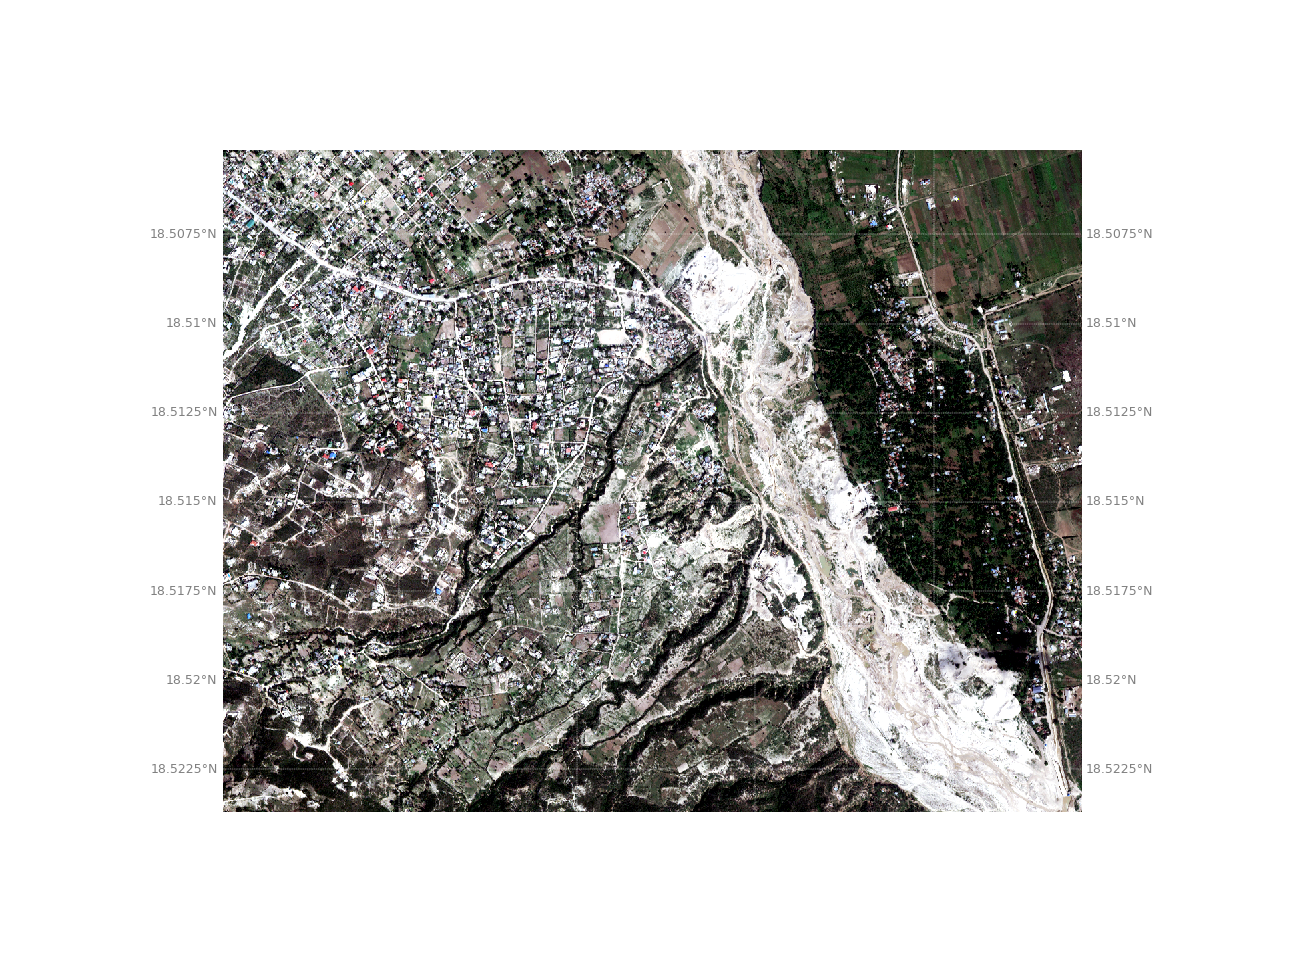

In [7]:
garray.show(bands=[3, 2, 1])

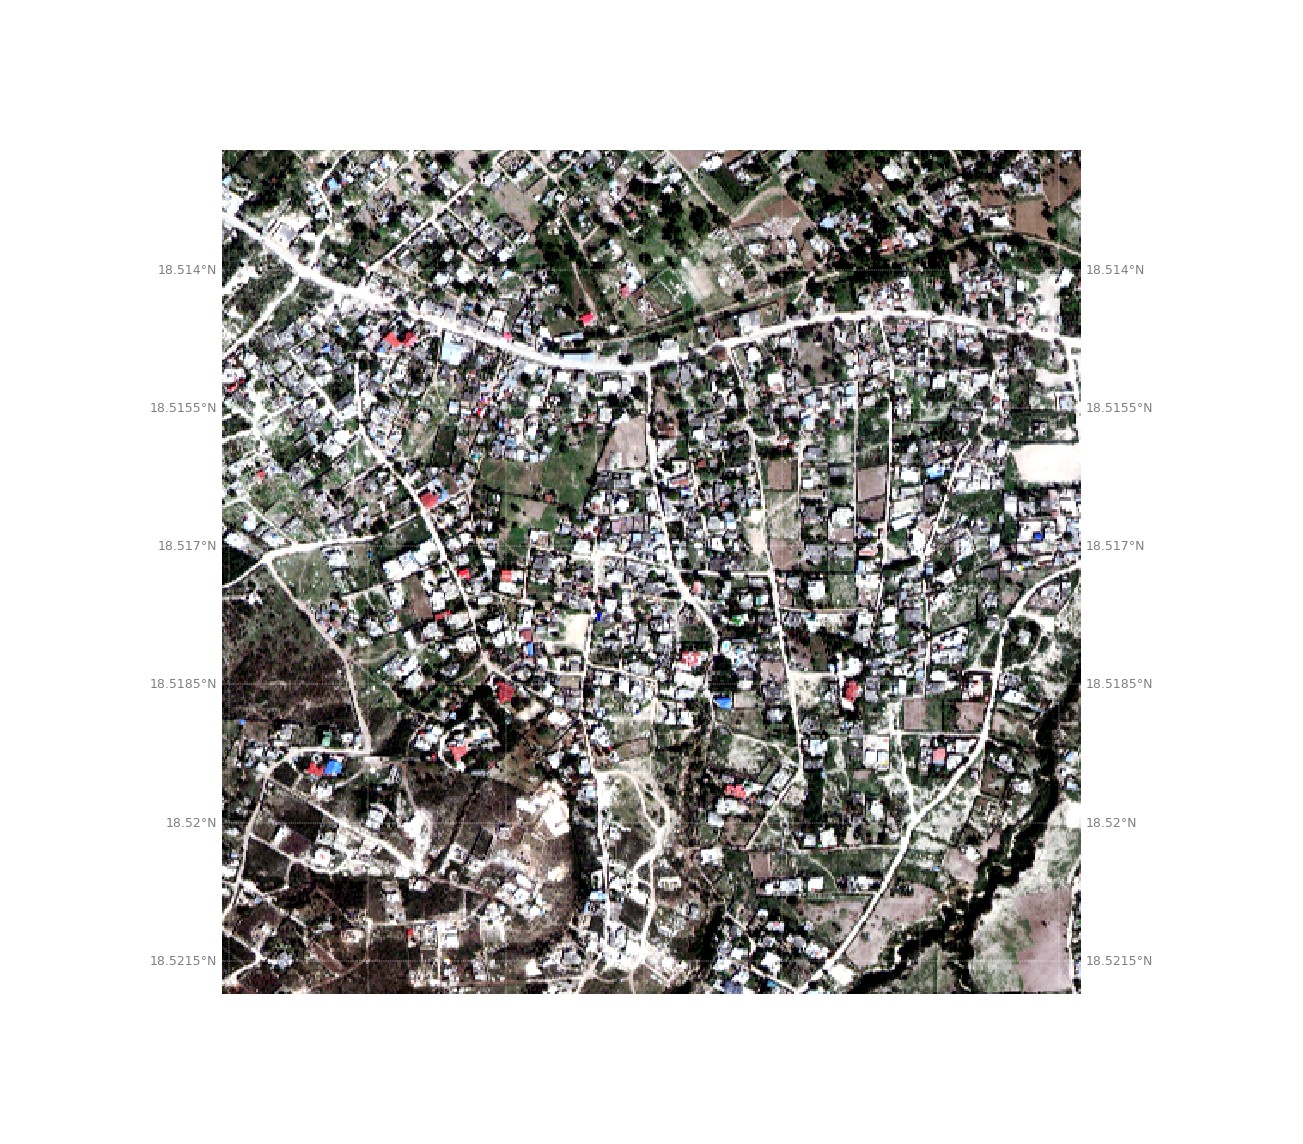

In [8]:
sub_array.show(bands=[3, 2, 1])

### Adding a `GeoArray` with a `NumPy` array of different size will return an error

In [9]:
garray + np.array(sub_array)

ValueError: operands could not be broadcast together with shapes (4,1008,1287) (4,500,500) 

### Adding a `GeoArray` with another `GeoArray` of different size will take the union

In [10]:
union = garray + sub_array.astype(float)

In [11]:
type(union)

geowombat.geoarray.GeoArray

In [12]:
union.shape

(4, 500, 500)

In [13]:
union.dtype

dtype('float64')

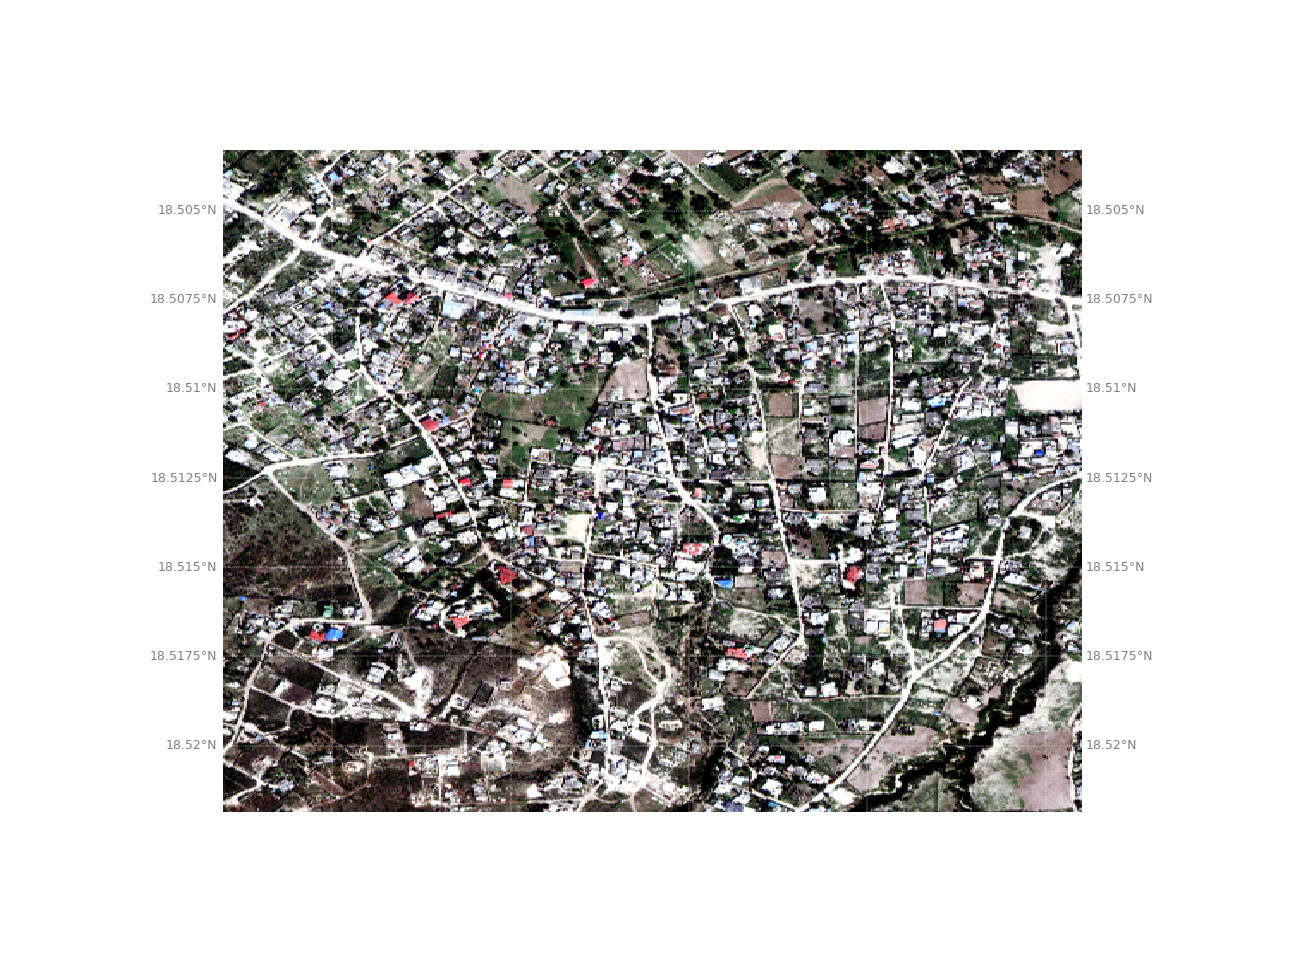

In [14]:
union.show(bands=[3, 2, 1])

### Combine operations

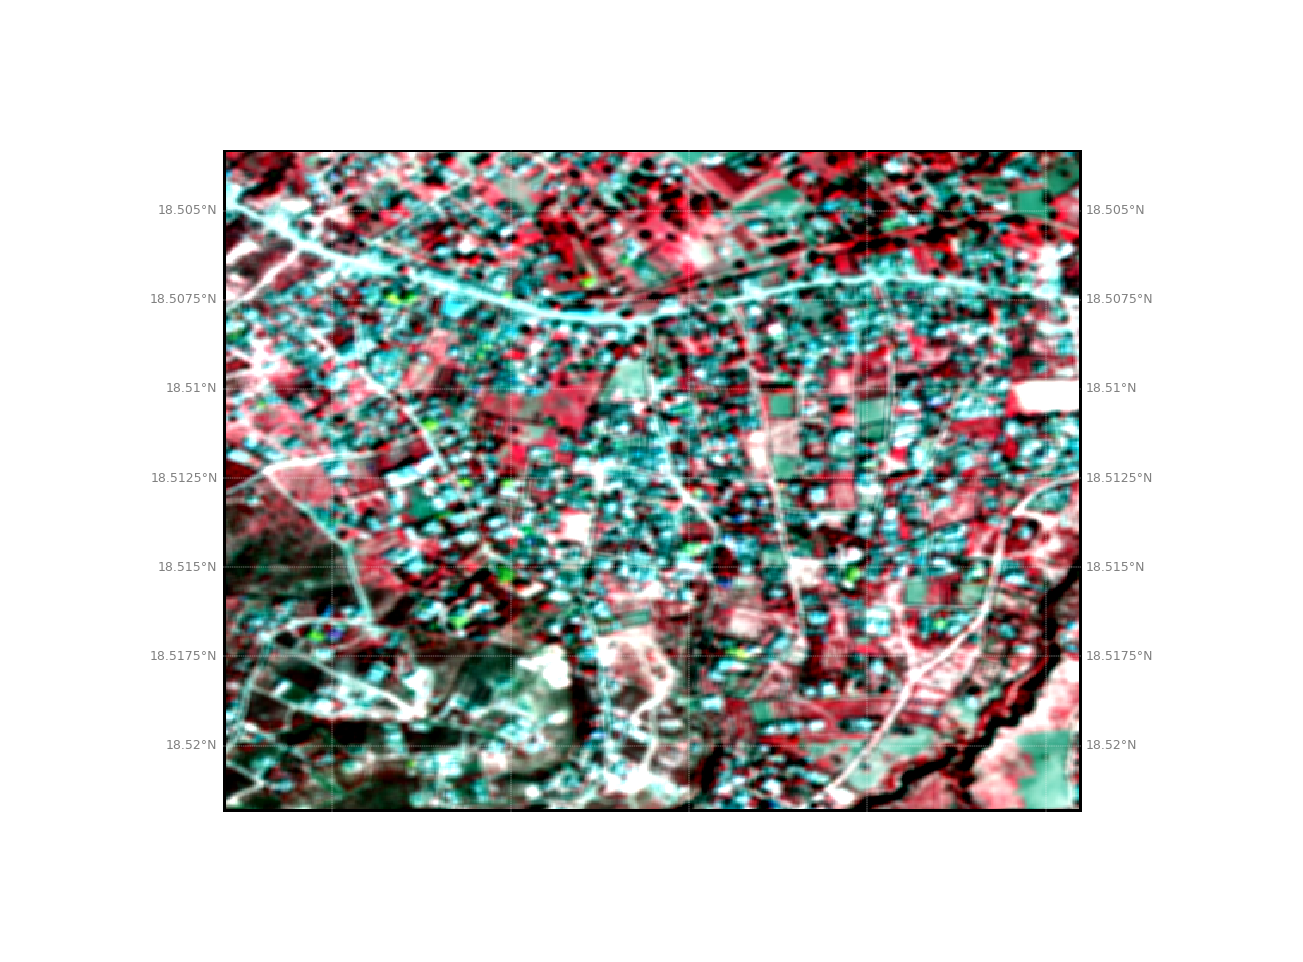

In [16]:
(garray + sub_array.astype(float)).moving(5).mean().show(bands=[4, 3, 2])

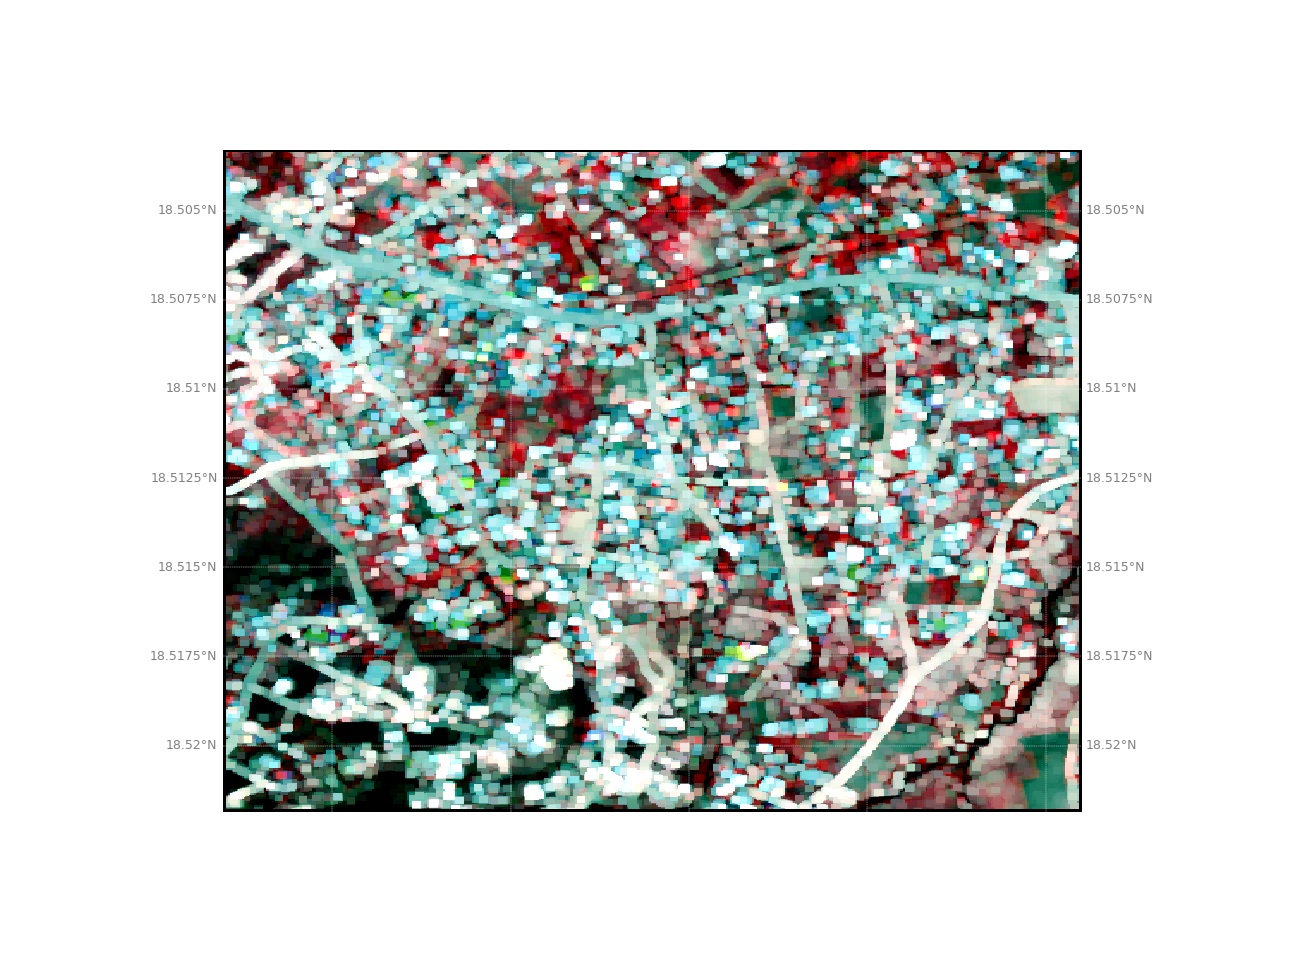

In [18]:
(garray * sub_array.astype(float)).moving(5).max().show(bands=[4, 3, 2])